In [ ]:
# https://www.kaggle.com/roshansharma/market-basket-analysis

In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
# import squarify
import seaborn as sns
from PIL import Image
plt.style.use('fivethirtyeight')

# for market basket analysis
# from mlxtend.frequent_patterns import apriori
# from mlxtend.frequent_patterns import association_rules

In [2]:
# reading the dataset

number_of_sample = 100
data = pd.read_csv('Market_Basket_Optimisation.csv', header = None)

# let's check the shape of the dataset
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# mdp를 위한 dataset으로 변경

> ## Skipping을 포함한 counting 함수 만들기

In [3]:
def skipping(k, basket:list):
    global cnt
    for i in range(k):
        lst3 = [-1] * (k-i) + basket[:i+1]
        lst4 = []
        for value in lst3:
            if value != -1:
                lst4.append(item2idx[value])
            else:
                lst4.append(value)
        
        if tuple(lst4) not in list2state:
            list2state[tuple(lst4)] = cnt
            cnt += 1
        
        # lst4에 대한 adjacency list 만들기
        a = lst4[1:]
        for j in range(i+1, len(basket)):
            b = a + [item2idx[basket[j]]]
            if tuple(b) not in list2state:
                list2state[tuple(b)] = cnt
                cnt += 1
                if tuple(b) not in adjlist[tuple(lst4)]:
                    if (j-(i+1)) <= 10:
                        adjlist[tuple(lst4)][tuple(b)] = round((1/2)**(j-(i+1)), 3)
                else:
                    if (j-(i+1)) <= 10:
                        adjlist[tuple(lst4)][tuple(b)] += round((1/2)**(j-(i+1)), 3)
            
            else:
                if (j-(i+1)) <= 10:
                    if tuple(b) not in adjlist[tuple(lst4)]:
                        adjlist[tuple(lst4)][tuple(b)] = round((1/2)**(j-(i+1)), 3)
                    else:
                        adjlist[tuple(lst4)][tuple(b)] += round((1/2)**(j-(i+1)), 3)
                        
    for i in range(len(basket)-(k+1)):
        lst2 = []
        lst2.append(item2idx[basket[i]])
        for j in range(i+1, i+k+1):
            lst2.append(item2idx[basket[j]])
        if tuple(lst2) not in list2state:
            list2state[tuple(lst2)] = cnt
            cnt += 1
            
        # lst2에 대한 adjacency list 만들기
        a = lst2[1:]
        for j in range(i+k+1, len(basket)):
            b = a + [item2idx[basket[j]]]
            if tuple(b) not in list2state:
                list2state[tuple(b)] = cnt
                cnt += 1
                if tuple(b) not in adjlist[tuple(lst2)]:
                    if (j-(i+k+1)) <= 10:
                        adjlist[tuple(lst2)][tuple(b)] = round((1/2)**(j-(i+k+1)), 3)
                else:
                    if (j-(i+k+1)) <= 10:
                        adjlist[tuple(lst2)][tuple(b)] += round((1/2)**(j-(i+k+1)), 3)
            else:
                if (j-(i+k+1)) <= 10:
                    if tuple(b) not in adjlist[tuple(lst2)]:
                        adjlist[tuple(lst2)][tuple(b)] = round((1/2)**(j-(i+1)), 3)
                    else:
                        adjlist[tuple(lst2)][tuple(b)] += round((1/2)**(j-(i+1)), 3)

In [4]:
from collections import defaultdict

lll = set()
list2state = defaultdict(int)
adjlist = defaultdict(dict)
cnt = 0

for i in range(number_of_sample):
    basket = data.loc[i,:][data.loc[i,:].isnull() == False].tolist()
    for val in basket:
        lll.add(val.strip())
    
item2idx = {j:i for i,j in enumerate(lll)}
idx2item = {i:j for i,j in enumerate(lll)}

def ttt(N):
    for i in range(number_of_sample):
        basket = list(map(lambda x: x.strip(), data.loc[i,:][data.loc[i,:].isnull() == False].tolist()))
        skipping(N, basket)
  
    return list2state, adjlist

state, tr_old = ttt(2)

# tr_predict 구하기

In [5]:
tr_predict = defaultdict(dict)

def tr_pre_fcn(dic):
    a = np.array(list(dic.values()))
    val = a / a.sum()
    cnt = 0
    for i in dic:
        dic[i] = round(val[cnt], 3)
        cnt+=1

    return dic

for i in tr_old:
    tr_predict[i] = tr_pre_fcn(tr_old[i])
    
tr_predict

defaultdict(dict,
            {(-1, -1, 3): {(-1, 3, 33): 0.201,
              (-1, 3, 84): 0.101,
              (-1, 3, 87): 0.05,
              (-1, 3, 85): 0.025,
              (-1, 3, 68): 0.012,
              (-1, 3, 20): 0.006,
              (-1, 3, 44): 0.003,
              (-1, 3, 69): 0.002,
              (-1, 3, 59): 0.001,
              (-1, 3, 48): 0.007,
              (-1, 3, 22): 0.0,
              (-1, 3, 62): 0.201,
              (-1, 3, 73): 0.101,
              (-1, 3, 17): 0.05,
              (-1, 3, 23): 0.025,
              (-1, 3, 2): 0.012,
              (-1, 3, 10): 0.201},
             (-1, 3, 33): {(3, 33, 84): 0.5,
              (3, 33, 87): 0.25,
              (3, 33, 85): 0.125,
              (3, 33, 68): 0.063,
              (3, 33, 20): 0.031,
              (3, 33, 44): 0.016,
              (3, 33, 69): 0.008,
              (3, 33, 59): 0.004,
              (3, 33, 48): 0.002,
              (3, 33, 22): 0.001,
              (3, 33, 17): 0.001},
          

> # Sequence간 similarity를 이용해 simcount 구하기(일단 보류)

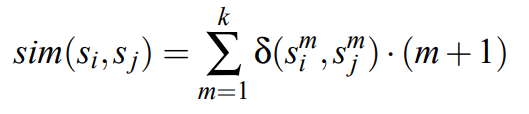

In [147]:
Image.open("image_01.png")

In [6]:
state = list(state)
sim = defaultdict(dict)

def simfcn(a, b):
    m = 1
    ans = 0    
    for i, j in zip(a,b):
        if (i != -1) and (j != -1):
            if i == j:
                ans += m
        m += 1
    return ans

# state간 similarity 구하기

for i in range(len(state)):
    for j in range(i+1, len(state)):
        s = simfcn(state[i], state[j])
        if s != 0:
            sim[state[i]][state[j]] = s
            sim[state[j]][state[i]] = s

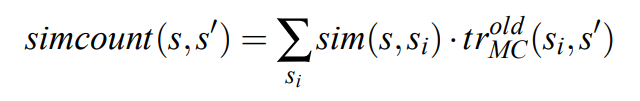

In [148]:
Image.open("image_02.png")

In [7]:
simcount = defaultdict(dict)

def simcountfcn(s,s_p):
    ans = 0
    # s의 자식노드들에 대해서(이것들은 이미 similarity != 0을 만족함.)
    for s_i in sim[s]:
        #s_i로부터 s'으로의 연결 선이 존재한다면
        if s_p in tr_predict[s_i]:
            ans += sim[s][s_i] * tr_predict[s_i][s_p]
    return ans

for i in range(len(state)):
    for j in range(i+1, len(state)):
        if (state[i][1:] == state[j][:-1]):
            op = simcountfcn(state[i], state[j])
            if op != 0:
                simcount[state[i]][state[j]] = round(op, 4)
                
simcount

defaultdict(dict,
            {(33, 84, 17): {(84, 17, 19): 3.335, (84, 17, 9): 1.665},
             (32, 28, 74): {(28, 74, 31): 5.0},
             (-1, 32, 77): {(32, 77, 57): 1.055,
              (32, 77, 18): 2.105,
              (32, 77, 28): 1.055,
              (32, 77, 74): 0.525,
              (32, 77, 31): 0.26},
             (-1, 60, 39): {(60, 39, 32): 1.055,
              (60, 39, 17): 2.105,
              (60, 39, 55): 1.055,
              (60, 39, 74): 0.525,
              (60, 39, 31): 0.26},
             (78, 32, 53): {(32, 53, 2): 5.0,
              (32, 53, 73): 2.855,
              (32, 53, 62): 1.43,
              (32, 53, 47): 0.715},
             (36, 38, 32): {(38, 32, 53): 5.0},
             (66, 39, 32): {(39, 32, 18): 0.07,
              (39, 32, 28): 0.035,
              (39, 32, 53): 0.06,
              (39, 32, 79): 2.665,
              (39, 32, 15): 1.335,
              (39, 32, 64): 0.665,
              (39, 32, 22): 0.335,
              (39, 32, 77): 1.

> ## simcount 계산 예제

In [8]:
# 전체 state에서 (-1, -1, 15)와 비슷한 state : similarity
# 얘네(s_i)를 거쳐서 s'으로 가는 길이 있다면 그 transition prob과 similarity를 곱해 더한다. 

# s'은 (47, 15, 76)이고, 개별 s_i들에 대해 ((-1, 47,15), (-1, 72, 15), (72, 71, 15), (72, 39, 15))
# s'으로의 transition probability가 존재하는 지를 check해줘야 함.

s = (-1,-1,15)
s_p = (47, 15, 76)
s_i_lst = [(-1, 47,15), (-1, 72, 15), (72, 71, 15), (72, 39, 15)]

# similarity가 0이 아닌 녀석들에 대해
for i in range(len(s_i_lst)):
    # s_i에서 s'로의 transition probability가 존재한다면,
    if s_p in tr_predict[s_i_lst[i]]:
        print(f"sim(s, s_{i+1}) * tr_pred(s_{i+1}, s') = {sim[s][s_i_lst[i]] * tr_predict[s_i_lst[i]][s_p]}")
        
# 그 값을 모두 더한게 simcount(s,s')이 됨.

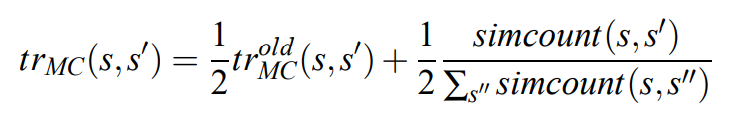

In [149]:
Image.open("image_03.png")

In [9]:
# 꼭 확률의 총 합이 1은 아님
# 따라서 normalize해줄 필요가 있음.

tr_mc = defaultdict(dict)

# tr_mc에 tr_predict 더하기
for i in tr_predict:
    for j in tr_predict[i]:
        if j not in tr_mc[i]:
            tr_mc[i][j] = (tr_predict[i][j]) / 2
        else:
            tr_mc[i][j] += (tr_predict[i][j]) / 2

# tr_mc에 simcount 더하기
for i in simcount:
    simsum = np.sum(list(simcount[i].values()))
    
    for j in simcount[i]:
        if j not in tr_mc[i]:
            tr_mc[i][j] = (simcount[i][j] / simsum) / 2
        else:
            tr_mc[i][j] += (simcount[i][j] / simsum) / 2

# 확률값으로 normalize

for i in tr_mc:
    sss = np.sum(list(tr_mc[i].values()))    
    for j in tr_mc[i]:
        tr_mc[i][j] = round(tr_mc[i][j]/sss, 4)

tr_mc

defaultdict(dict,
            {(-1, -1, 3): {(-1, 3, 33): 0.2014,
              (-1, 3, 84): 0.1012,
              (-1, 3, 87): 0.0501,
              (-1, 3, 85): 0.0251,
              (-1, 3, 68): 0.012,
              (-1, 3, 20): 0.006,
              (-1, 3, 44): 0.003,
              (-1, 3, 69): 0.002,
              (-1, 3, 59): 0.001,
              (-1, 3, 48): 0.007,
              (-1, 3, 22): 0.0,
              (-1, 3, 62): 0.2014,
              (-1, 3, 73): 0.1012,
              (-1, 3, 17): 0.0501,
              (-1, 3, 23): 0.0251,
              (-1, 3, 2): 0.012,
              (-1, 3, 10): 0.2014},
             (-1, 3, 33): {(3, 33, 84): 0.4995,
              (3, 33, 87): 0.2498,
              (3, 33, 85): 0.1249,
              (3, 33, 68): 0.0629,
              (3, 33, 20): 0.031,
              (3, 33, 44): 0.016,
              (3, 33, 69): 0.008,
              (3, 33, 59): 0.004,
              (3, 33, 48): 0.002,
              (3, 33, 22): 0.001,
              (3, 33, 17): 

# 알파 베타 구하기

In [15]:
def itemidxfcn(data):
    lst = []
    for i in range(number_of_sample):
        lst2 = []
        a = data.loc[i,:]
        for v in a[a.isnull() == False].tolist():
            lst2.append(item2idx[v])
        lst.append(list(reversed(lst2)))
    return lst

idxlst = itemidxfcn(data)
idxlst

idxlst = np.array(idxlst)

df = pd.DataFrame(idxlst)
df.head()

,0
0,"[80, 11, 74, 26, 28, 32, 65, 17, 22, 48, 59, 6..."
1,"[53, 72, 78]"
2,[52]
3,"[84, 36]"
4,"[22, 55, 57, 77, 32]"


In [24]:
# 각각의 item에 대한 prior distribution 구하기
# item r이 구매된 개수 / 전체 아이템 개수

full_item_lst = []

for i in range(number_of_sample):
    full_item_lst += df.iloc[i,:].tolist()[0]

p_r = pd.Series(full_item_lst).value_counts() / np.sum(pd.Series(full_item_lst).value_counts())

# 알파에 쓸 감마 값 정의
gamma = 1/1000

In [17]:
p_r

32    0.070225
39    0.056180
53    0.053371
22    0.042135
47    0.039326
        ...   
40    0.002809
45    0.002809
46    0.002809
52    0.002809
87    0.002809
Length: 88, dtype: float64

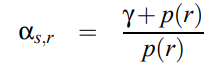

In [38]:
Image.open("image_04.png")

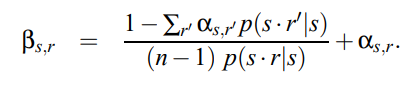

In [39]:
Image.open("image_05.png")

> ### beta값이 negative하면 small positive 값으로 세팅
> ### beta값을 곱한 값들의 합으로 나눠서 확률값으로 만들어야함

In [18]:
# alpha(s,r)

def alpha(r):
    return (gamma + p_r[r])/p_r[r]

def beta(s, s_p, r):
    # s에서 전이 가능한 전체 state의 수 
    n = len(tr_mc[s])
    
    numer = 1
    lst = list(tr_mc[s].values())
    for i in range(n):
        numer -= alpha(r) * lst[i]
    if tr_mc[s][s_p] != 0:
        deno = (n-1) * tr_mc[s][s_p]
        bb = numer / deno + alpha(r)
        if bb < 0:
            return 0.001
        else:
            return bb
    else:
        return 0.001

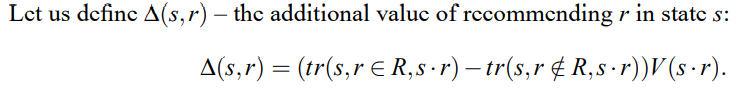

In [100]:
Image.open("image_06.png")

# state value function 초기화하기(optimal action을 구하기 위함)
> policy improvement 단계를 먼저 거친다고 생각하면 됨.

In [19]:
v = defaultdict(float)
for s in state:
    v[s] = 1.0

# policy improvement

> - optimal action(추천 리스트)를 additive value를 이용해 구함

> - 구해진 추천 리스트가 현재 state에서의 action값이 되고 deterministic하게 policy가 됨

In [20]:
def policy_improvement(v):
    alpha_val = defaultdict(list)
    beta_val = defaultdict(list)
    
    for s in tr_predict:
        for r in idx2item:
            s_p = list(s[1:])
            s_p.append(r)
            s_p = tuple(s_p)

            # tr_predict(s,s')이 존재하면 그제서야 alpha * tr(s,s'), beta * tr(s,s')으로 연산이 가능해 짐.
            if s_p in state:
                # s'이 s로부터 발생했던 경우에만 연산이 가능.
                if s_p in tr_mc[s]:
                    add = (alpha(r) * tr_mc[s][s_p]) * v[s_p]
                    beta_val[s].append((s_p, beta(s, s_p, r) * tr_mc[s][s_p] * v[s_p])) 
                    alpha_val[s].append((s_p, round(add, 6)))
    
    return alpha_val, beta_val
    
# recommendation list for each state
a,b = policy_improvement(v)

# 알파

for i in a:
    arr = np.array(a[i])[:,1]
    a[i] = np.array(a[i])
    a[i][:,1] = arr / np.sum(arr)

# 베타 정규화

for i in b:
    arr = np.array(b[i])[:,1]
    b[i] = np.array(b[i])
    
    b[i][:,1] = arr / np.sum(arr)
    
# 이제 이 값(a)을 additive value로 사용

for i in a:
    a[i][:,1] = a[i][:,1] - b[i][:,1]

C:\Users\SM129\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


# Optimal recommend set(top-k)

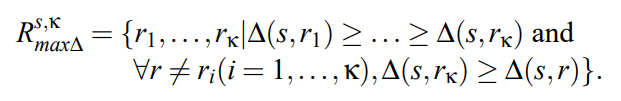

In [3]:
Image.open("image_07.png")

> - 위에서 구한 add_val을 내림차순으로 정렬한다.

> - k번째까지의 상품 r을 추천해준다.

> - 이게 구해지는 순간 특정 state에서의 action이 fix된다.(policy가 결정되었다고 판단)

In [21]:
# top N개의 상품을 추천
# 여기서 top N개를 채우지 못하면?
# 협업필터링 + demographic한 정보도 활용!

k = 3
r_lst = defaultdict(list)

for i in a:
    r_lst[i] = [i[0][k-1] for i in sorted(a[i], key = lambda x: -x[1])[:k]]
    
r_lst

defaultdict(list,
            {(-1, -1, 3): [85, 87, 68],
             (-1, 3, 33): [68, 44, 20],
             (3, 33, 84): [68, 44, 59],
             (33, 84, 87): [59, 44, 69],
             (84, 87, 85): [59, 17, 48],
             (87, 85, 68): [59, 17, 65],
             (85, 68, 20): [59, 65, 17],
             (68, 20, 44): [65, 59, 17],
             (20, 44, 69): [65, 28, 26],
             (44, 69, 59): [65, 26, 28],
             (69, 59, 48): [26, 65, 74],
             (59, 48, 22): [26, 74, 11],
             (48, 22, 17): [26, 11, 74],
             (22, 17, 65): [26, 11, 80],
             (17, 65, 32): [11, 80, 26],
             (65, 32, 28): [11, 80, 74],
             (32, 28, 26): [11, 80, 74],
             (28, 26, 74): [11, 80],
             (26, 74, 11): [80],
             (-1, -1, 78): [2, 33, 43],
             (-1, 78, 72): [53],
             (-1, -1, 36): [23, 41, 14],
             (-1, -1, 32): [35, 82, 12],
             (-1, 32, 77): [74, 55, 31],
             (32, 77, 

# state s에서 action R(r1,...,rK)을 실시했을 때 얻게되는 reward 정의

* top k개의 recom list가 구해지면 이미 action이 정해진 것임. 이제 개별 item별로 가지는 reward가 뭐인지에 대한 reward design.
>- 레시피를 만들어? 레시피와의 상호관계, 유통기한, 가격

* 개별 상품 r에 대해 reward를 각기 계산함.
>- 유통기한이나 다른 것들과의 밸런스 정도? + 레시피와의 연계정도? + lift를 기반으로?
>- 추천했을 때(판매를 가정하는 상황) 웹사이트에 오는 이점을 통해 reward를 계산

* 임의의 set R에 존재하는 r에 대해 모두 더함(reward 간의 독립성 가정).
>- 단순하게 더하는 거 말고 다른 방법이 있을까?

* State value function V(s) 구하기
>- value evaluation

In [22]:
# recommended item list l이 주어짐
# l에서 하나씩 아이템을 뽑아와서 그 아이템 하나하나가 가지는 reward를 더해서 총 리워드를 보냄.

def rwd_fcn(l):
    rr = 0
    for i in l:
        rr += i % 3
    return rr

# Value function evaluation(policy evaluation) given policy(top-k set)
> - Bellman optimality equation

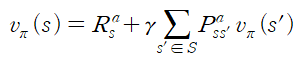

In [4]:
Image.open("image_08.png")

In [23]:
gam = 0.99

def policy_evaluation(v):
    v_new = defaultdict(float)
    for s in v:
        reward = rwd_fcn(r_lst[s])
        sigma = 1
        for s_p in tr_mc[s]:
            sigma += tr_mc[s][s_p] * v[s_p]
        v_new[s] = reward + gam * sigma
    
    return v_new

v = policy_evaluation(v)
v

defaultdict(float,
            {(-1, -1, 3): 4.9799999999999995,
             (-1, 3, 33): 7.980099,
             (-1, 3, 84): 0.99,
             (-1, 3, 87): 0.99,
             (-1, 3, 85): 0.99,
             (-1, 3, 68): 0.99,
             (-1, 3, 20): 0.99,
             (-1, 3, 44): 0.99,
             (-1, 3, 69): 0.99,
             (-1, 3, 59): 0.99,
             (-1, 3, 48): 0.99,
             (-1, 3, 22): 0.99,
             (-1, 3, 17): 0.99,
             (-1, 3, 65): 0.99,
             (-1, 3, 32): 0.99,
             (-1, 3, 28): 0.99,
             (-1, 3, 26): 0.99,
             (-1, 3, 74): 0.99,
             (-1, 3, 11): 0.99,
             (-1, 3, 80): 0.99,
             (3, 33, 84): 7.980099,
             (3, 33, 87): 0.99,
             (3, 33, 85): 0.99,
             (3, 33, 68): 0.99,
             (3, 33, 20): 0.99,
             (3, 33, 44): 0.99,
             (3, 33, 69): 0.99,
             (3, 33, 59): 0.99,
             (3, 33, 48): 0.99,
             (3, 33, 22): 0.99,